## Import modules and relevant files

In [1]:
print 'importing modules  '
import os
import subprocess
from datetime import datetime as time
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from Bio.Seq import Seq
%matplotlib inline

### UPDATE
sequence_file = "./.fastq.gz"

sequence_file_name = "./"

importing modules  


## Extracting primer sequences and barcodes from the reference files

In [2]:


#CCATCTCATCCCTGCGTGTCTCCGACTCAG ATGACTCAGT GATGTCCACGAGGTCTCT
#                    TCCGACTCAG ATGACTCAGT GATGTCCACGAGGTCTCT   [20:]
#                    TCCGACTCAG ATGACTCAGT GATGTCCACG           [20:50]
#CCATCTCATCCCTGCGTGTCTCCGACTCAG ATAGCAGTGC GATGTCCACGAGGTCTCT
#CCATCTCATCCCTGCGTGTCTCCGACTCAG ACGATCTATC GATGTCCACGAGGTCTCT
#CCATCTCATCCCTGCGTGTCTCCGACTCAG AGCATGTCAT GATGTCCACGAGGTCTCT
#CCATCTCATCCCTGCGTGTCTCCGACTCAG CGAGTATGAT GATGTCCACGAGGTCTCT

#                               ACGATCTATC GATGTCCACGAGGTCTCTATGAACTTGCGCTCAATTCCCGTATGCTGCAGGTCGACGGATCCCCGGGTTAATTAAGGCGCGCCAGATCTGTTTAGCTATAGTGTGC
#                                                                                   GCGCCAGATCTGTTTAGCACTGAGTCATATCACCGACTGCCCATAGAGAGGAAAGCGG

#ATGAACTTGCGCTCAATTCCCGTATGCTGCAGGTCGACGGATCCCCGGGTTAATTAAGGCGCGCCAGATCTGTTTAGC TATAGTGTGC
#                                                            GCGCCAGATCTGTTTAGC ACTGAGTCAT ATCACCGACTGCCCATAGAGAGGAAAGCGG
#                                                            GCGCCAGATCTGTTTAGC GAGCTATATC ATCACCGACTGCCCATAGAGAGGAAAGCGG
#                                                                                 GCTATATC ATCACCGACTGCCCATAGAGAG  [20:50]
#                                                                      TGTTTAGC GAGCTATATC ATCACCGACTGC            [10:40]
#                                                                    TCTGTTTAGC GAGCTATATC ATCACCGACT              [8:38]
# ACGATCTATC                                                                                                  TATAGTGTGC
# ACGATCTATC GATGTCCACGAGGTCTCT ATGAACTTGCGCTCAATTCC CGTATGCTGCAGGTCGACGGATCCCCGGGTTAATTAAGGCGCGCCAGATCTGTTTAGC TATAGTGTGC
#                               ATGAACTTGCGCTCAATTCC
# 

#print Seq(index_seq_dict['7|21|1|D1|A9'][1]).reverse_complement()[8:38]

test_seq = 'ACGATCTATCGATGTCCACGAGGTCTCTATGAACTTGCGCTCAATTCCCGTATGCTGCAGGTCGACGGATCCCCGGGTTAATTAAGGCGCGCCAGATCTGTTTAGCTATAGTGTGC'

strain_barcode_up_flank = 'CGAGGTCTCT'

strain_barcode_down_flank = 'CGTATGCTGC'




###########################  CGAGGTCTCTATGAACTTGCGCTCAATTCCCGTATGCTGC
print len('ACGATCTATCGATGTCCACGAGGTCTCTATGAACTTGCGCTCAATTCCCGTATGCTGCAGGTCGACGGATCCCCGGGTTAATTAAGGCGCGCCAGATCTGTTTAGCTATAGTGTGC')
# min read len will be 116
print 'ACGATCTATCGATGTCCACGAGGTCTCTATGAACTTGCGCTCAATTCCCGTATGCTGCAGGTCGACGGATCCCCGGGTTAATTAAGGCGCGCCAGATCTGTTTAGCTATAGTGTGC'[20:51]

116
AGGTCTCTATGAACTTGCGCTCAATTCCCGT


In [3]:
indexes_for_libraries = './Barcodes/indexes_for_libraries.csv'


index_lib_dict = {}

lib_index_by_tuple = {}

for_index_seq ={}
rev_index_seq ={}


with open(indexes_for_libraries, 'r') as source:
    
    next(source)
    
    for line in source:
        
        line = line.strip('\n')
        line = line.split(',')
        
        sample = '|'.join([line[0], line[1], line[2]])
        indexes = [line[3], line[5]]
        
        index_lib_dict[sample] = indexes
        
        if line[3] not in for_index_seq.keys():
            
            for_index_seq[line[3]] = line[4][20:50]
            
        if line[5] not in rev_index_seq.keys():
            
            rev_index_seq[line[5]] = str(Seq(line[6]).reverse_complement())[8:38]
            
            
        lib_index_by_tuple[tuple(indexes)] = sample
        
        
       
        
print lib_index_by_tuple.items()
#looks good

print for_index_seq
print rev_index_seq

[(('C8', 'A7'), '2|16|1'), (('C9', 'A4'), '3|5|2'), (('D4', 'A8'), '10|16|2'), (('D2', 'A10'), '8|21|2'), (('C10', 'A6'), '4|10|2'), (('C11', 'A4'), '5|5|2'), (('D5', 'A5'), '11|10|1'), (('D4', 'A5'), '10|10|1'), (('C10', 'A9'), '4|21|1'), (('D5', 'A8'), '11|16|2'), (('C12', 'A8'), '6|16|2'), (('C7', 'A4'), '1|5|2'), (('C8', 'A4'), '2|5|2'), (('C9', 'A7'), '3|16|1'), (('C10', 'A3'), '4|5|1'), (('C11', 'A7'), '5|16|1'), (('C11', 'A10'), '5|21|2'), (('C12', 'A5'), '6|10|1'), (('D7', 'A4'), '12|5|2'), (('C7', 'A10'), '1|21|2'), (('D7', 'A7'), '12|16|1'), (('D3', 'A5'), '9|10|1'), (('C8', 'A10'), '2|21|2'), (('D8', 'A12'), '2|0|1'), (('D1', 'A8'), '7|16|2'), (('C12', 'A6'), '6|10|2'), (('D7', 'A10'), '12|21|2'), (('D2', 'A7'), '8|16|1'), (('D3', 'A6'), '9|10|2'), (('D1', 'A6'), '7|10|2'), (('C12', 'A3'), '6|5|1'), (('C8', 'A8'), '2|16|2'), (('C9', 'A3'), '3|5|1'), (('C7', 'A9'), '1|21|1'), (('C10', 'A7'), '4|16|1'), (('C11', 'A3'), '5|5|1'), (('D5', 'A6'), '11|10|2'), (('D4', 'A4'), '10|5|

## For and Rev Indexes

In [4]:
for_indexes = './for_indexes.fa'
rev_indexes = './rev_indexes.fa'




with open(for_indexes, 'w') as output:
    
    for f_index in for_index_seq.keys():
        
        fasta_header = '>'+ f_index + '\n'
        fasta_seq =  for_index_seq[f_index] + '\n'

        output.write(fasta_header)
        output.write(fasta_seq)

        


with open(rev_indexes, 'w') as output:
    
    for r_index in rev_index_seq.keys():
        
        fasta_header = '>'+ r_index + '\n'
        fasta_seq =  rev_index_seq[r_index] + '\n'

        output.write(fasta_header)
        output.write(fasta_seq)
        
        
        

## strain barcodes

In [21]:
strain_fasta = './strain_barcodes.fa'

strain_bc_key = './Barcodes/Strains_pool_light_noNfmt.csv'

with open(strain_fasta, 'w') as output:
    
    with open(strain_bc_key, 'r') as source:

                next(source)

                for line in source:

                    line_data = line.strip('\n').split(';')

                    guide_name = '|'.join([line_data[0], line_data[1], line_data[2]])
                    guide_seq = line_data[3]

                    fasta_header = '>'+ guide_name + '\n'
                    fasta_seq = strain_barcode_up_flank + guide_seq + strain_barcode_down_flank +'\n'

                    output.write(fasta_header)
                    output.write(fasta_seq)


In [35]:
# command line calls

# for indexes
bowtie-build -f -r -o 4 for_indexes.fa bleuven_ION_nov2018_for_indexes

# rev indexes
bowtie-build -f -r -o 4 rev_indexes.fa bleuven_ION_nov2018_rev_indexes

# guides
bowtie-build -f -r -o 4 strain_barcodes.fa bleuven_ION_nov2018_strain_indexes

SyntaxError: invalid syntax (<ipython-input-35-f0b4f949ed2a>, line 4)

In [ ]:
fastqc A.Dube_Cabsoil_p01_c01.fastq.gz

java -jar trimmomatic-0.36.jar SE -threa 6 -phred33 /home/phdes74/path_to_Dropbox/lab_manuscripts/Bleuven_ION/A.Dube_Cabsoil_p01_c01.fastq.gz /home/phdes74/path_to_Dropbox/lab_manuscripts/Bleuven_ION/A.Dube_Cabsoil_p01_c01_trim_110.fastq.gz MINLEN:115 CROP:115
      
fastqc A.Dube_Cabsoil_p01_c01_trim_110.fastq.gz


In [33]:


index_for_align_param = 'bowtie -t -v 0 -p 6 -k 1 --trim3 97 --norc -u 40000000 bleuven_ION_nov2018_for_indexes '
# parameters for forward index alignments. Based on optimization work done in BAR-SEQ notebook
index_for_align_output = 'index_for_1.txt'
# alignment output filepath as string
index_for_align_call = index_for_align_param + 'A.Dube_Cabsoil_p01_c01_trim_110.fastq' + ' ' + index_for_align_output

print index_for_align_call

# alignement call as a string
subprocess.check_output(index_for_align_call, shell = True)
# performs the alignment



index_rev_align_param = 'bowtie -t -v 0 -p 6 -k 1 --trim5 100 --norc -u 40000000 bleuven_ION_nov2018_rev_indexes '
# parameters for reverse index alignments. Based on optimization work done in BAR-SEQ notebook
index_rev_align_output = 'index_rev_1.txt'
# alignment output filepath as string
index_rev_align_call = index_rev_align_param + 'A.Dube_Cabsoil_p01_c01_trim_110.fastq' + ' ' + index_rev_align_output
# alignement call as a string
subprocess.check_output(index_rev_align_call, shell = True)
# performs the alignment

print index_rev_align_call



guide_align_param = 'bowtie -t -v 0 -p 6 -k 1 --trim3 70 --trim5 19 --norc -m 1 -u 40000000 bleuven_ION_nov2018_strain_indexes '
# parameters for perfect guide alignments. Based on optimization work done in BAR-SEQ notebook
bc_align_output = 'strain_bc_1.txt'
# alignment output filepath as string
bc_align_call = guide_align_param + 'A.Dube_Cabsoil_p01_c01_trim_110.fastq' + ' ' + bc_align_output
# alignement call as a string
subprocess.check_output(bc_align_call, shell = True)
# performs the alignment

print bc_align_call

bowtie -t -v 0 -p 6 -k 1 --trim3 97 --norc -u 40000000 bleuven_ION_nov2018_for_indexes A.Dube_Cabsoil_p01_c01_trim_110.fastq index_for_1.txt
bowtie -t -v 0 -p 6 -k 1 --trim5 100 --norc -u 40000000 bleuven_ION_nov2018_rev_indexes A.Dube_Cabsoil_p01_c01_trim_110.fastq index_rev_1.txt
bowtie -t -v 0 -p 6 -k 1 --trim3 70 --trim5 19 --norc -m 1 -u 40000000 bleuven_ION_nov2018_strain_indexes A.Dube_Cabsoil_p01_c01_trim_110.fastq strain_bc_1.txt


In [34]:
print bc_align_call

bowtie -t -v 0 -p 6 -k 1 --trim3 70 --trim5 19 --norc -m 1 -u 40000000 bleuven_ION_nov2018_strain_indexes A.Dube_Cabsoil_p01_c01_trim_110.fastq strain_bc_1.txt


In [35]:
guide_counts_counter_dict = {}
# a dict that will hold one instance of a Counter() object for each library in the experiment (20 total). Each of
# those Counter objects will be used the count the number of reads for each guide in each library based the bowtie
# alignment data


for lib in index_lib_dict.keys():
    # loops through the samples in the experiment
    
    guide_counts_counter_dict[lib] = Counter()
    # creates an empty Counter() for guide count

bc_align_output = 'strain_bc_1.txt'
index_for_align_output = 'index_for_1.txt'
index_rev_align_output = 'index_rev_1.txt'


    

In [36]:
index_found_for = {}
index_found_rev = {}
# empty containers that will hold    read_name: index    data pairs for the forward and reverse reads that
# had valid alignments


with open(index_for_align_output, 'r') as for_index_positives:
    for line in for_index_positives:
        # opens P1 index alignment pack file and loops through lines

        line = line.split('\t')
        # split line to extract data
        read_name = line[0]
        # Only keep the cluster coordinates and run associated info, not the illumina annotations in the read 
        # name. See http://support.illumina.com/content/dam/illumina-support/help/BaseSpaceHelp_v2/Content/Vault/
        #           Informatics/Sequencing_Analysis/BS/swSEQ_mBS_FASTQFiles.htm
        # For info on illumina read name convention
        index_found_for[read_name] = line[2]
        # add read P1 index to dict

print len(index_found_for.keys())
# log entry: number of reads with valid P1 index alignments

with open(index_rev_align_output, 'r') as rev_index_positives:
    for line in rev_index_positives:
        # opens P2 index alignment pack file and loops through lines

        line = line.split('\t')
        # split line to extract data
        read_name = line[0]
        # Only keep the cluster coordinates and run associated info
        index_found_rev[read_name] = line[2]
        # add read P2 index to dict

print len(index_found_rev.keys())
# log entry: number of reads with valid P2 index alignments


both_indexes = set(index_found_for.keys()) & set(index_found_rev.keys())
print len(both_indexes)
# Use the set data format to quickly id reads with valid alignments for both P1 and P2 indexes, and stores the
# taht number for the read pack in the log

del both_indexes




barcode_match = {}
# empty containers that will hold    read_name: guide    data pairs for the forward reads that had alignments
# with 0 mismatches at the right location in the reference sequence set

with open(bc_align_output, 'r') as matches:
    for line in matches:
        # opens gRNA alignment pack file and loops through lines

        line = line.split('\t')
        # split line to extract data
        read_name = line[0]
        # Only keep the cluster coordinates and run associated info
        guide = line[2]
        # the guide for which a match was found

        if int(line[3]) in range(0, 5):
            # the alignment is at the right location in the guide sequence

            barcode_match[read_name] = guide
            # add read:guide to dict

print len(barcode_match.keys())
# adds the number of perfect matches found in the pack of reads





38344726
35515990
34085271
35678281


In [37]:
indexes_and_guides = set(index_found_for.keys()) & set(index_found_rev.keys()) & set(barcode_match.keys())
print len(indexes_and_guides)
# uses sets in python to find the set of reads for which the P1, P2 and gRNA alignments were good


30812839


In [38]:
print lib_index_by_tuple.keys()

correct_libs = set([x for x in lib_index_by_tuple.keys()])

[('C8', 'A7'), ('C9', 'A4'), ('D4', 'A8'), ('D2', 'A10'), ('C10', 'A6'), ('C11', 'A4'), ('D5', 'A5'), ('D4', 'A5'), ('C10', 'A9'), ('D5', 'A8'), ('C12', 'A8'), ('C7', 'A4'), ('C8', 'A4'), ('C9', 'A7'), ('C10', 'A3'), ('C11', 'A7'), ('C11', 'A10'), ('C12', 'A5'), ('D7', 'A4'), ('C7', 'A10'), ('D7', 'A7'), ('D3', 'A5'), ('C8', 'A10'), ('D8', 'A12'), ('D1', 'A8'), ('C12', 'A6'), ('D7', 'A10'), ('D2', 'A7'), ('D3', 'A6'), ('D1', 'A6'), ('C12', 'A3'), ('C8', 'A8'), ('C9', 'A3'), ('C7', 'A9'), ('C10', 'A7'), ('C11', 'A3'), ('D5', 'A6'), ('D4', 'A4'), ('D5', 'A9'), ('C12', 'A9'), ('C7', 'A7'), ('D7', 'A8'), ('C8', 'A5'), ('D2', 'A9'), ('C9', 'A6'), ('C11', 'A9'), ('C10', 'A4'), ('C11', 'A6'), ('D5', 'A3'), ('D4', 'A7'), ('D4', 'A10'), ('D7', 'A5'), ('D2', 'A3'), ('C9', 'A9'), ('D8', 'A11'), ('C10', 'A10'), ('C12', 'A7'), ('D7', 'A6'), ('D2', 'A6'), ('D1', 'A10'), ('D9', 'A12'), ('D3', 'A7'), ('D1', 'A7'), ('D9', 'A11'), ('C7', 'A3'), ('D7', 'A3'), ('C8', 'A9'), ('D2', 'A5'), ('D1', 'A9'), ('D

In [39]:
chimera = 0

for read in indexes_and_guides:
    # loops through the reads tht passed the filter

    for_i = index_found_for[read]
    # gets the P1 index of the read

    rev_i = index_found_rev[read]
    # gets the P2 index of the read
    
    if tuple((for_i, rev_i)) in correct_libs:

        lib = lib_index_by_tuple[tuple((for_i, rev_i))]
        # gets the sample to which the read should be assigned based on P1, P2 combination

        guide = barcode_match[read]
        # gets the guide associated with the read

        guide_counts_counter_dict[lib][guide] += 1
        # a count for the guide detected in its specific sample
        
    else:
        
        chimera += 1 



del index_found_for
del index_found_rev
del barcode_match

print chimera

1737


In [40]:
## for part 2 of reads

In [41]:
index_for_align_param = 'bowtie -t -v 0 -p 5 -k 1 --trim3 97 --norc -s 40000000 bleuven_ION_nov2018_for_indexes '
# parameters for forward index alignments. Based on optimization work done in BAR-SEQ notebook
index_for_align_output = 'index_for_2.txt'
# alignment output filepath as string
index_for_align_call = index_for_align_param + 'A.Dube_Cabsoil_p01_c01_trim_110.fastq' + ' ' + index_for_align_output

print index_for_align_call

# alignement call as a string
subprocess.check_output(index_for_align_call, shell = True)
# performs the alignment



index_rev_align_param = 'bowtie -t -v 0 -p 5 -k 1 --trim5 100 --norc -s 40000000 bleuven_ION_nov2018_rev_indexes '
# parameters for reverse index alignments. Based on optimization work done in BAR-SEQ notebook
index_rev_align_output = 'index_rev_2.txt'
# alignment output filepath as string
index_rev_align_call = index_rev_align_param + 'A.Dube_Cabsoil_p01_c01_trim_110.fastq' + ' ' + index_rev_align_output
# alignement call as a string
subprocess.check_output(index_rev_align_call, shell = True)
# performs the alignment

print index_rev_align_call



guide_align_param = 'bowtie -t -v 0 -p 5 -k 1 --trim3 70 --trim5 19 --norc -m 1 -s 40000000 bleuven_ION_nov2018_strain_indexes '
# parameters for perfect guide alignments. Based on optimization work done in BAR-SEQ notebook
bc_align_output = 'strain_bc_2.txt'
# alignment output filepath as string
bc_align_call = guide_align_param + 'A.Dube_Cabsoil_p01_c01_trim_110.fastq' + ' ' + bc_align_output
# alignement call as a string
subprocess.check_output(bc_align_call, shell = True)
# performs the alignment

print bc_align_call

bowtie -t -v 0 -p 5 -k 1 --trim3 97 --norc -s 40000000 bleuven_ION_nov2018_for_indexes A.Dube_Cabsoil_p01_c01_trim_110.fastq index_for_2.txt
bowtie -t -v 0 -p 5 -k 1 --trim5 100 --norc -s 40000000 bleuven_ION_nov2018_rev_indexes A.Dube_Cabsoil_p01_c01_trim_110.fastq index_rev_2.txt
bowtie -t -v 0 -p 5 -k 1 --trim3 70 --trim5 19 --norc -m 1 -s 40000000 bleuven_ION_nov2018_strain_indexes A.Dube_Cabsoil_p01_c01_trim_110.fastq strain_bc_2.txt


In [42]:
bc_align_output = 'strain_bc_2.txt'
index_for_align_output = 'index_for_2.txt'
index_rev_align_output = 'index_rev_2.txt'

index_found_for = {}
index_found_rev = {}
# empty containers that will hold    read_name: index    data pairs for the forward and reverse reads that
# had valid alignments


with open(index_for_align_output, 'r') as for_index_positives:
    for line in for_index_positives:
        # opens P1 index alignment pack file and loops through lines

        line = line.split('\t')
        # split line to extract data
        read_name = line[0]
        # Only keep the cluster coordinates and run associated info, not the illumina annotations in the read 
        # name. See http://support.illumina.com/content/dam/illumina-support/help/BaseSpaceHelp_v2/Content/Vault/
        #           Informatics/Sequencing_Analysis/BS/swSEQ_mBS_FASTQFiles.htm
        # For info on illumina read name convention
        index_found_for[read_name] = line[2]
        # add read P1 index to dict

print len(index_found_for.keys())
# log entry: number of reads with valid P1 index alignments

with open(index_rev_align_output, 'r') as rev_index_positives:
    for line in rev_index_positives:
        # opens P2 index alignment pack file and loops through lines

        line = line.split('\t')
        # split line to extract data
        read_name = line[0]
        # Only keep the cluster coordinates and run associated info
        index_found_rev[read_name] = line[2]
        # add read P2 index to dict

print len(index_found_rev.keys())
# log entry: number of reads with valid P2 index alignments


both_indexes = set(index_found_for.keys()) & set(index_found_rev.keys())
print len(both_indexes)
# Use the set data format to quickly id reads with valid alignments for both P1 and P2 indexes, and stores the
# taht number for the read pack in the log

del both_indexes




barcode_match = {}
# empty containers that will hold    read_name: guide    data pairs for the forward reads that had alignments
# with 0 mismatches at the right location in the reference sequence set

with open(bc_align_output, 'r') as matches:
    for line in matches:
        # opens gRNA alignment pack file and loops through lines

        line = line.split('\t')
        # split line to extract data
        read_name = line[0]
        # Only keep the cluster coordinates and run associated info
        guide = line[2]
        # the guide for which a match was found

        if int(line[3]) in range(0, 5):
            # the alignment is at the right location in the guide sequence

            barcode_match[read_name] = guide
            # add read:guide to dict

print len(barcode_match.keys())
# adds the number of perfect matches found in the pack of reads



11520485
10376682
9957479
10707082


In [43]:
indexes_and_guides = set(index_found_for.keys()) & set(index_found_rev.keys()) & set(barcode_match.keys())
print len(indexes_and_guides)
# uses sets in python to find the set of reads for which the P1, P2 and gRNA alignments were good

8992667


In [44]:
for read in indexes_and_guides:
    # loops through the reads tht passed the filter

    for_i = index_found_for[read]
    # gets the P1 index of the read

    rev_i = index_found_rev[read]
    # gets the P2 index of the read
    
    if tuple((for_i, rev_i)) in correct_libs:

        lib = lib_index_by_tuple[tuple((for_i, rev_i))]
        # gets the sample to which the read should be assigned based on P1, P2 combination

        guide = barcode_match[read]
        # gets the guide associated with the read

        guide_counts_counter_dict[lib][guide] += 1
        # a count for the guide detected in its specific sample
        
    else:
        
        chimera += 1 



del index_found_for
del index_found_rev
del barcode_match

print chimera

2256


100
64107.0
1371055.0
39803250.0


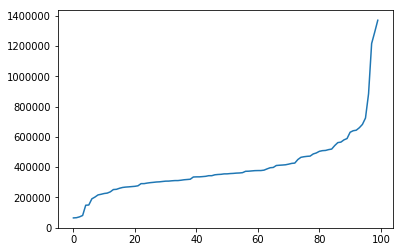

In [45]:
counts_DF = pd.DataFrame.from_dict(guide_counts_counter_dict)

counts_DF.head(10)


print len(counts_DF.columns)

print min(counts_DF.sum(axis =0))
print max(counts_DF.sum(axis =0))

print sum(counts_DF.sum(axis =0))



plt.plot(sorted(counts_DF.sum(axis =0)))   
    

In [46]:
counts_DF.head(10)


counts_DF.to_csv('./read_count_table_harsh.csv', sep = ',', index_label='Strain')